In [65]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*Do not pass an `input_shape`.*")
from sklearn.preprocessing import OneHotEncoder

In [66]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping

In [67]:
#load data
data = pd.read_csv("C:/Users/ADMIN/Documents/kcb/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f'Number of rows and columns: {data.shape}')

data.head()

Number of rows and columns: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
#drop customerID
data.drop(['customerID'], axis=1, inplace=True)
data.shape

(7043, 20)

In [70]:
#change TotalCharges to numeric
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [71]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
#check unique values per column
unique_values_per_column = data.apply(lambda x: x.unique())
unique_values_per_column

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [73]:
#changing values
data.loc[data['MultipleLines'] == 'No phone service', 'MultipleLines'] = 'No'

data.loc[data['OnlineSecurity'] == 'No internet service', 'OnlineSecurity'] = 'No'

data.loc[data['OnlineBackup'] == 'No internet service', 'OnlineBackup'] = 'No'

data.loc[data['DeviceProtection'] == 'No internet service', 'DeviceProtection'] = 'No'

data.loc[data['TechSupport'] == 'No internet service', 'TechSupport'] = 'No'

data.loc[data['StreamingTV'] == 'No internet service', 'StreamingTV'] = 'No'

data.loc[data['StreamingMovies'] == 'No internet service', 'StreamingMovies'] = 'No'

data.apply(lambda x:x.unique())

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                                               [No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                              [No, Yes]
OnlineBackup                                                [Yes, No]
DeviceProtection                                            [No, Yes]
TechSupport                                                 [No, Yes]
StreamingTV                                                 [No, Yes]
StreamingMovies                                             [No, Yes]
Contract            

In [74]:
#check missing data
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
#replace null values with those calculated by monthly charges * tenure months
data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'], inplace=True)
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [76]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
binary_columns = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
numeric = data.select_dtypes(include=['int64', 'float64']).columns


In [79]:
#function to encode the categorical variables
## Function to encode the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

def encode_categorical_data(data):
    encoded_data = data.copy()
    label_encoder = LabelEncoder()
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':
            encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    return encoded_data

def one_hot_encode(data):
    encoded_data = data.copy()
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':
            encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
            encoded_col = pd.DataFrame(encoder.fit_transform(encoded_data[[col]]))
            encoded_col.columns = [col + '_' + str(i) for i in range(encoded_col.shape[1])]
            encoded_data = pd.concat([encoded_data, encoded_col], axis=1)
            encoded_data.drop(col, axis=1, inplace=True)
    return encoded_data


# First, encode categorical data using LabelEncoder
encoded_data = encode_categorical_data(data)

# Then, apply one-hot encoding
encoded_data = one_hot_encode(encoded_data)

encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [80]:
# Split the data into features and target variable
X = encoded_data.drop(columns=["Churn"])  # Features
y =encoded_data["Churn"]  # Target variable

### Data Visualization For EDA

In [81]:
#churn distribution
import plotly.io as pio
import plotly.offline as pyo
colors = {'Yes': 'black', 'No': 'purple'}
Churn_distribution = data['Churn'].value_counts()
fig2 = px.pie(names=Churn_distribution.index, values=Churn_distribution.values, title='Churn Distribution',color=Churn_distribution.index,
              color_discrete_map=colors)
pyo.iplot(fig2)

5174 clients i.e 73.5% did not churn while 1869 clients i.e 26.5% did churn

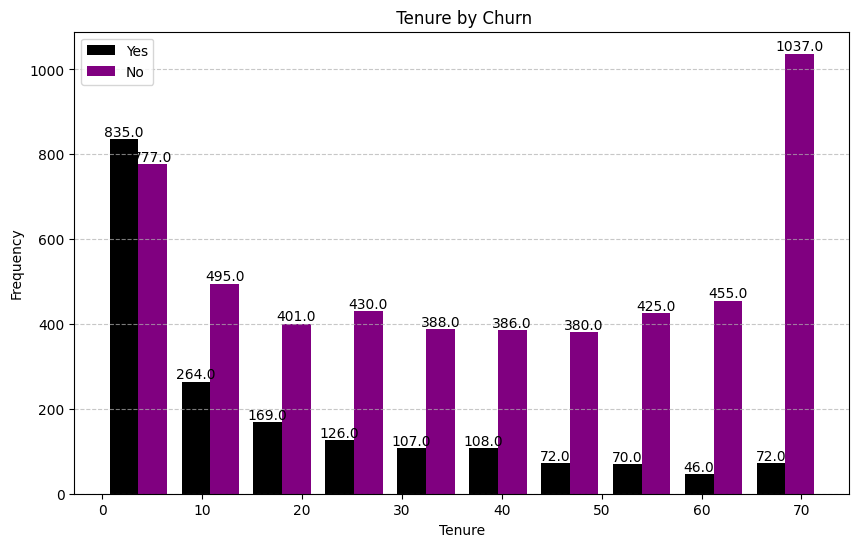

In [82]:
# plot for tenure by churn
churned = data[data['Churn'] == 'Yes']
not_churned = data[data['Churn'] == 'No']
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['black', 'purple'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

After the fourth month, the number of clients who churn decreases significantly, while the number of clients who do not churn peaks in the seventh month.

In [83]:
#monthly charges by churn
fig = px.histogram(data, x="MonthlyCharges", color="Churn",
                   title="Monthly Charges by Churn",
                   labels={"MonthlyCharges": "Monthly Charges", "Churn": "Churn"},
                   color_discrete_map={"Yes": "black", "No": "purple"})
fig.show()


In [84]:
#total charges by churn
fig = px.histogram(data, x="TotalCharges", color="Churn",
                   title="Total Charges by Churn",
                   labels={"Total Charges": "TotalCharges", "Churn": "Churn"},
                   color_discrete_map={"Yes": "black", "No": "purple"},
                   )
fig.show()


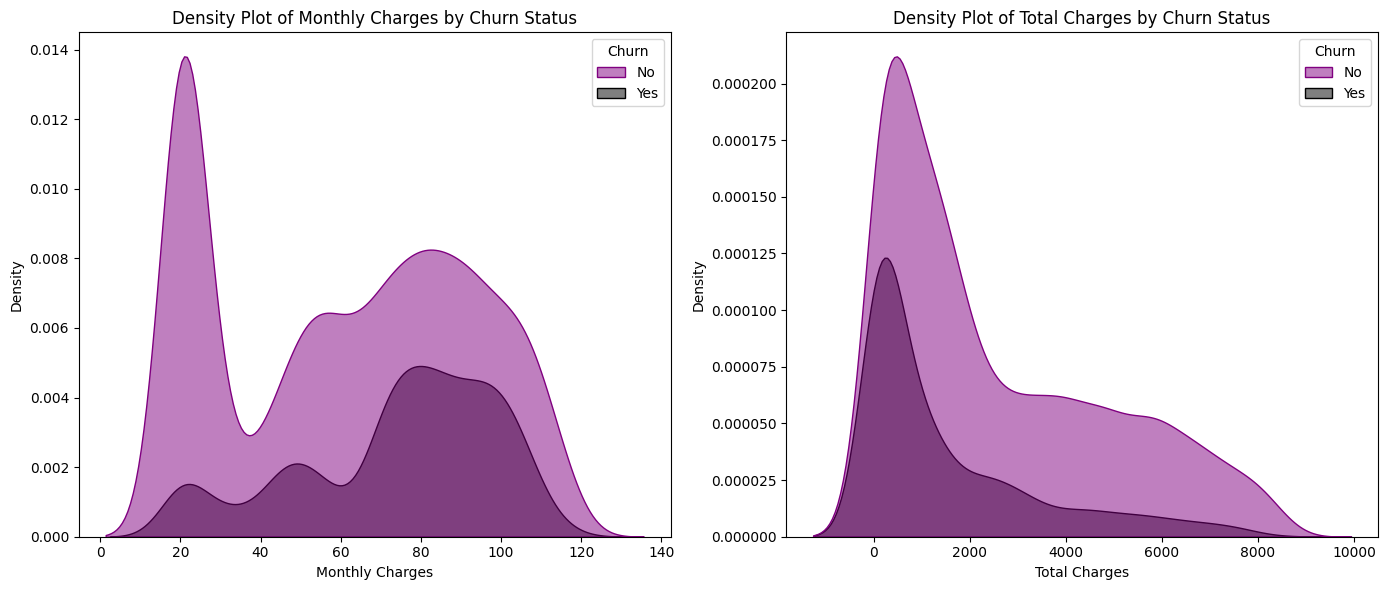

In [85]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = {'Yes': 'black', 'No': 'purple'}
# Plot for Monthly Charges
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0], palette=colors)
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=data, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1], palette=colors)
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [86]:
# Gender Distribution
gender_distribution = data['gender'].value_counts(normalize=True)
fig = px.bar(x=gender_distribution.index, y=gender_distribution.values, 
             title='Gender Distribution', labels={'x': 'gender', 'y': 'Percentage'})
fig.update_traces(marker_color=['skyblue', 'pink'])


fig.show()

Ratio of Males to Females is balanced

In [87]:
grouped = data.groupby(['gender', 'Churn']).size()
total_counts = grouped.groupby('gender').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Gender_Churn = pd.DataFrame({'rate': normalized_count}).reset_index()

In [88]:
#Bar chart of Gender and Churn
colors = {'Yes': 'black', 'No': 'purple'}
fig = px.bar(Gender_Churn, x='rate', y='gender', color='Churn',
             title='100% Stacked Bar Chart by Gender and Churn', text= 'rate',
             labels={'rate': 'Percentage'},color_discrete_map=colors)

fig.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig.show()

Churn is not influenced by Gender

In [89]:
#contract distribution
colors = ['blue', 'green', 'yellow']
Contract_Label_counts= data['Contract'].value_counts()
fig1 = px.pie(names= Contract_Label_counts.keys(), values= Contract_Label_counts.values, title='Contract Distribution',color_discrete_sequence=colors)
fig1.show()

There's a higher rate of clients on the month-to-month subscription

In [90]:
grouped = data.groupby(['Contract', 'Churn']).size()
total_counts = grouped.groupby('Contract').transform('sum')
normalized_count = round(grouped / total_counts,2)
Contract_Churn = pd.DataFrame({'normalized_count': normalized_count}).reset_index()

In [91]:
colors = {'Yes': 'black', 'No': 'purple'}
fig = px.bar(Contract_Churn, x='normalized_count', y='Contract', color='Churn',
             title='100% Stacked Bar Chart by Contract and Churn Label', text= 'normalized_count',
             labels={'normalized_count': 'Percentage'}, color_discrete_map=colors)

fig.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig.show()

Churn rate is highest for month-to-month subcriptions at 43% that's mean 43% of customers who had a Month-to-month contract type left the service. The churn rate is lower for one-year contracts, at 11%, and even lower for two-year contracts, at 3%.

#### Payment

In [92]:
#payment method distribution
colors = ['blue', 'green', 'yellow']
Payment_Method_counts= data['PaymentMethod'].value_counts()
fig = px.pie(names= Payment_Method_counts.keys(), values= Payment_Method_counts.values, title='Payment Method Distribution',color_discrete_sequence=colors)
fig.show()

In [93]:
# Group by 'Contract' and 'Churn' and count the occurrences
grouped = data.groupby(['PaymentMethod', 'Churn']).size()
total_counts = grouped.groupby('PaymentMethod').transform('sum')
normalized_count = round(grouped / total_counts,2)
Payment_Method_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

color = {'Yes': 'black', 'No': 'purple'}
fig = px.bar(Payment_Method_ChurnLabel, x='rate', y='PaymentMethod', color='Churn',
             title='100% Stacked Bar Chart by Payment Method and Churn', text= 'rate',
             labels={'rate': 'Percentage'}, color_discrete_map=color)

fig.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig.show()

Customers with an electronic check as a payment method had the highest churn rate of 45% while Credit card payment method has the least churn rate of 15%

In [94]:
#internet service distribution
colors = ['blue', 'green', 'yellow']
Internet_Service_counts= data['InternetService'].value_counts()
fig = px.pie(names= Internet_Service_counts.keys(), values= Internet_Service_counts.values, title='Internet Service Distribution',color_discrete_sequence=colors)
fig.show()

In [95]:
# Group by 'Internet Service' and 'Churn' and count the occurrences
grouped = data.groupby(['InternetService', 'Churn']).size()
total_counts = grouped.groupby('InternetService').transform('sum')
normalized_count = round(grouped / total_counts,2)
Internet_Service_Churn = pd.DataFrame({'rate': normalized_count}).reset_index()

color = {'Yes': 'black', 'No': 'purple'}
fig = px.bar(Internet_Service_Churn, x='rate', y='InternetService', color='Churn',
             title='100% Stacked Bar Chart by Internet Service and Churn', text= 'rate',
             labels={'rate': 'Percentage'}, color_discrete_map=color)

fig.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig.show()

Customers with optical fiber Internet have the highest churn rate about 42% and the least churn rate by clients with no internet service about 7%

#### Relation between Payment Method and Internet Service

In [96]:
# Group by 'Payment Method', 'Internet Service', and 'Churn' and count the occurrences
grouped = data.groupby(['PaymentMethod', 'InternetService', 'Churn']).size()
total_counts = grouped.groupby(['PaymentMethod', 'InternetService']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
Payment_InternetService_Churn = pd.DataFrame({'churn': churn_rate}).reset_index()

# Create a DataFrame with the total count per city
Payment_InternetService_counts = data.groupby(['PaymentMethod', 'InternetService']).size().reset_index()
Payment_InternetService_counts.rename(columns={0: 'count'}, inplace=True)

# Merge the Payment_InternetService_ChurnLabel and Payment_InternetService_counts DataFrames
Payment_InternetService_Churn = Payment_InternetService_Churn.merge(Payment_InternetService_counts, on=['PaymentMethod', 'InternetService'])

# Filter out the rows where 'Churn Label' is 'No' and sort the dataframe by count
Payment_InternetService_Churn = Payment_InternetService_Churn[Payment_InternetService_Churn['Churn'] == 'Yes']
Payment_InternetService_Churn = Payment_InternetService_Churn.sort_values(by='count', ascending=False)

#Creating Sunburst chart based on air, ground or naval unit type
colors = ['blue', 'green', 'yellow']
fig = px.sunburst(Payment_InternetService_Churn, path=['InternetService', 'PaymentMethod'], values='count',
                  color='InternetService', 
                  title="Count of customer by Payment Method and Internet Service",color_discrete_sequence=colors)

fig.show()

Fiber optic clients had electronic check as a more favourable payment method while those without internet service had a prefence for mailed check

#### Tech Support

In [97]:
# Calculate the total counts of each group
grouped = data.groupby(['TechSupport', 'Churn']).size()

total_counts = grouped.groupby('TechSupport').transform('sum')

# Calculate the normalized count (percentage) of each group
normalized_count = round(grouped / total_counts * 100, 2)

# Create a DataFrame with the normalized counts
Internet_Service_Churn = pd.DataFrame({'rate': normalized_count}).reset_index()

# Create a 100% stacked bar chart
color = {'Yes': 'black', 'No': 'purple'}
fig = px.bar(Internet_Service_Churn, x='rate', y='TechSupport', color='Churn',
             title='100% Stacked Bar Chart by Tech Support and Churn', text='rate',
             labels={'rate': 'Percentage'},color_discrete_map=color)

# Update the layout to make the bar chart 100% stacked
fig.update_layout(barmode='relative')

# Show the plot
fig.show()

Customers with the highhest churn rate at 31% had no tech support

Count plot to describe the remaining columns with respect to churn

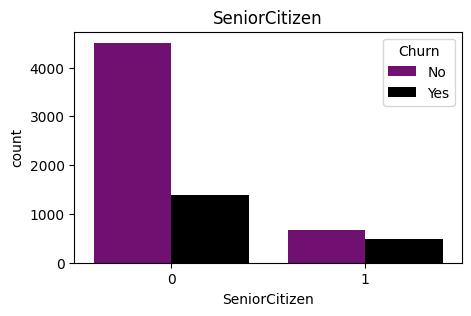

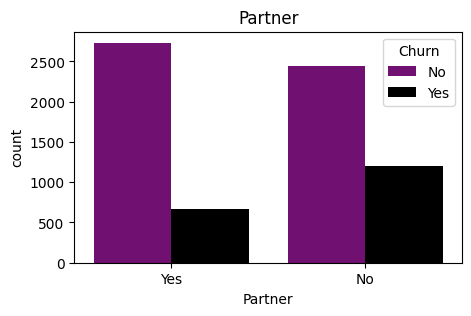

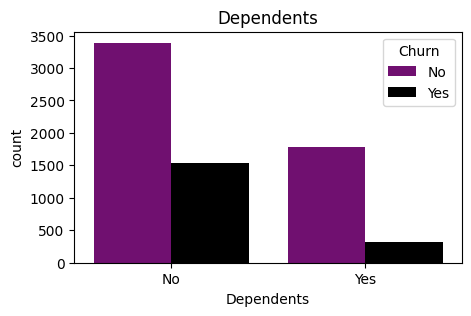

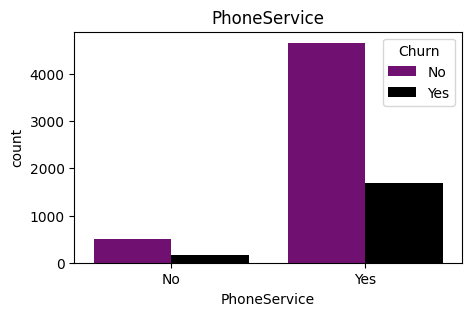

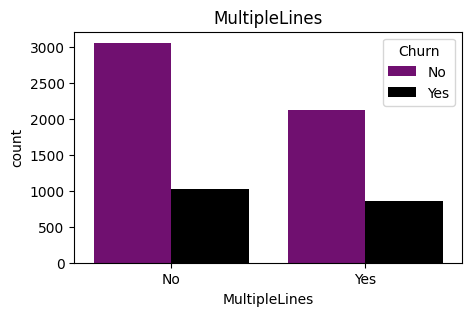

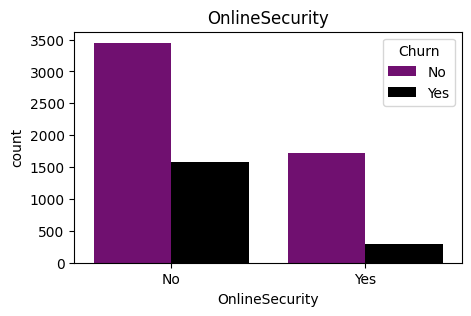

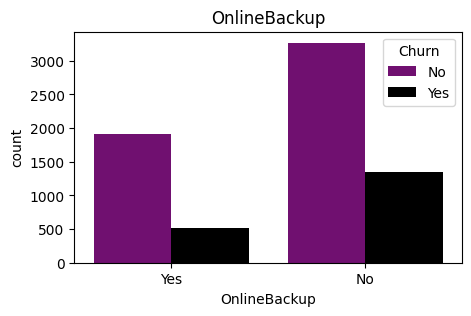

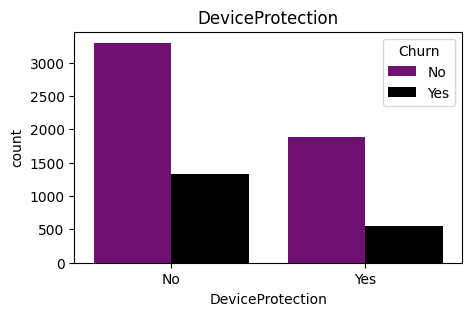

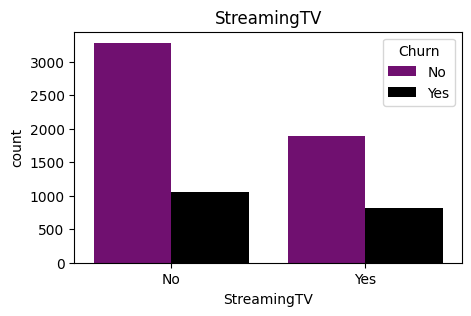

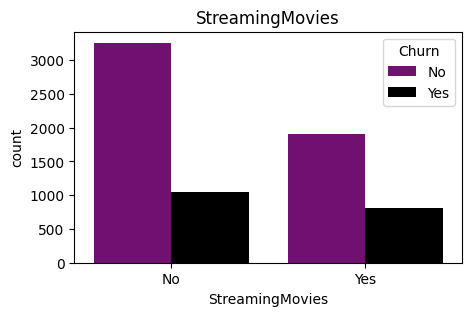

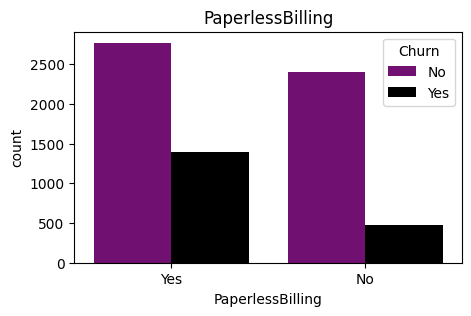

In [98]:
# Define colors for Yes and No
colors = {'Yes': 'black', 'No': 'purple'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'purple', 1: 'black'}

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure', 'gender', 'InternetService',
'TechSupport', 'Contract', 'PaymentMethod'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=data, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

Feature Importance

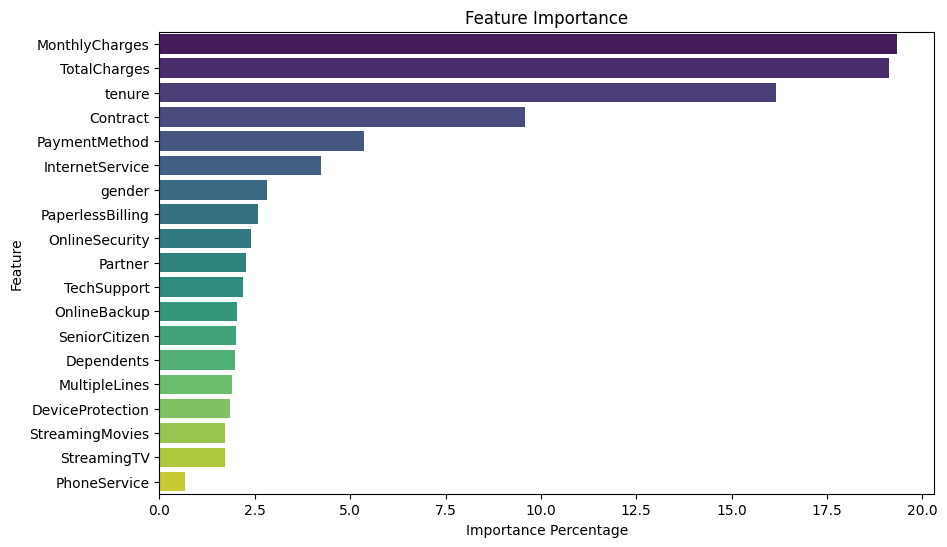

In [99]:
# Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
target_column = 'Churn'
feature_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate importance percentage
total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Importance_percentage'] = (feature_importance_df['Importance'] / total_importance) * 100

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_percentage', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.show()

Correlation Matrix

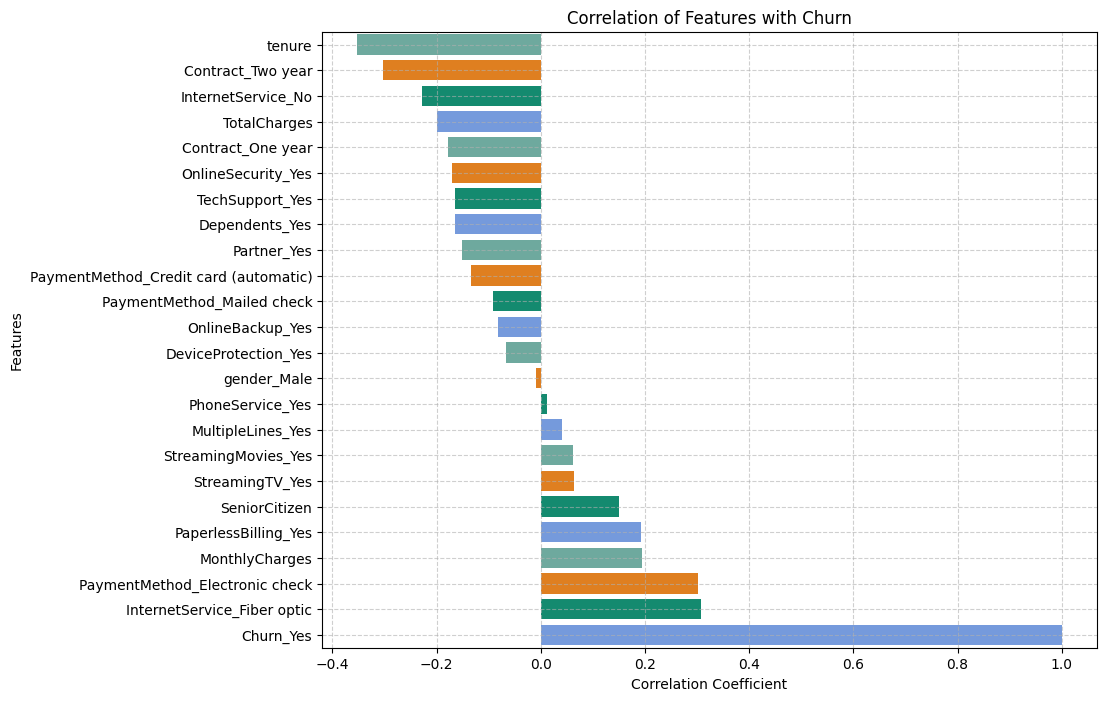

In [100]:
# Convert all categorical variables to dummy variables
df_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values with respect to 'Churn_Yes' column
churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#64B3A4', '#FF7F00', '#009E79', '#6495ED']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


From the correlation matrix, we can observe several trends:

1. Customers who use fiber optic internet or opt for electronic checks are more likely to cancel their service. This could be attributed to potentially higher costs or issues with billing, indicating a need for improved service in these areas.

2. Longer contract durations (one or two years) are associated with lower churn rates. This implies that longer-term commitments are effective in retaining customers and reducing churn.

3. Customers who subscribe to additional tech services such as online security, tech support, or device protection are less likely to churn. This highlights the value these services provide and their role in enhancing customer loyalty.

4. Older customers exhibit a higher likelihood of churning. This underscores the importance of tailoring services and communications to the preferences and needs of older demographics to minimize turnover.

### Customer segmentation

To identify customer segments at risk of churning based on the most impactful features, we will apply K-means clustering. These features include:

1. Tenure: The length of time the customer has been with the company.
2. Monthly Charges: The amount the customer is billed each month.
3. Total Charges: The total amount the customer has been billed.
4. Internet Service: The type of internet service the customer has.
5. Contract: The type of contract the customer has (e.g., month-to-month, one year, two years).
6. Payment Method: The customer's preferred payment method.

By clustering customers based on these features, we can identify groups with similar characteristics and potentially predict which customers are at a higher risk of churning.

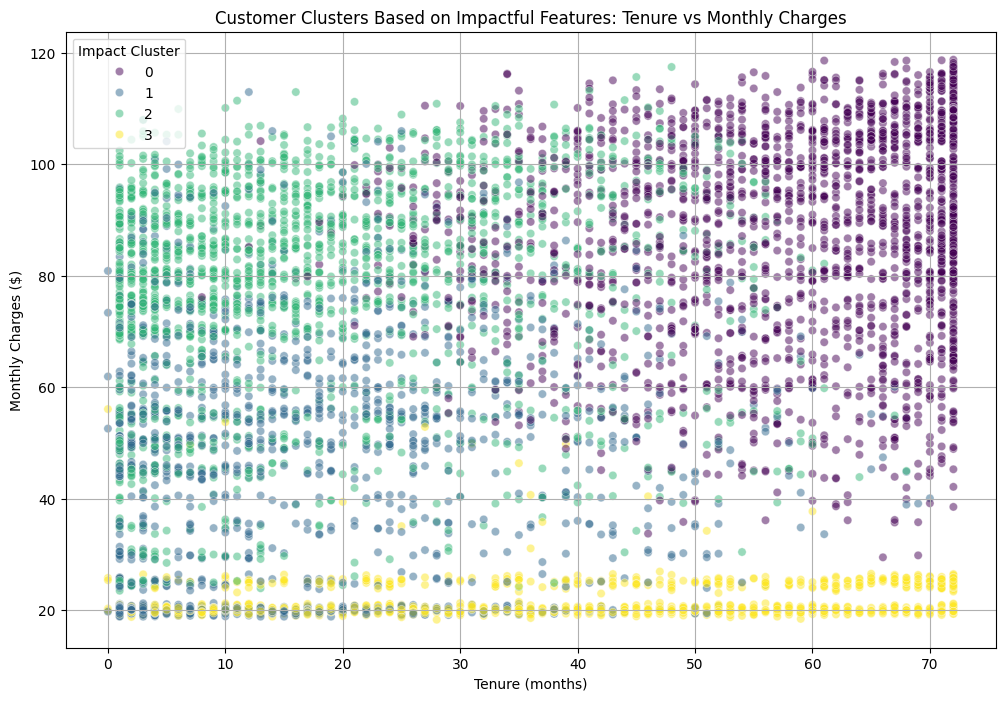

In [101]:
# One-hot encoding the categorical columns
from sklearn.cluster import KMeans
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = data[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
data['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=data, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()

Cluster 0 (light green): This cluster consists of customers with medium to high monthly charges and a range of tenure lengths. These customers may use more services or higher-tier services, making them potentially valuable to the business.

Cluster 1 (purple): Customers in this cluster have higher monthly charges and longer tenure, suggesting they are loyal customers with high service usage or premium services. They are likely to be valuable and less likely to churn.

Cluster 2 (yellow): This cluster includes customers with lower monthly charges and shorter tenure, indicating they are newer or more price-sensitive customers. They may require targeted strategies to retain them.

Cluster 3 (blue): Encompassing customers with lower to medium monthly charges and a broad range of tenure, this cluster represents a mixed segment with stable, yet budget-conscious customers. Understanding their needs can help in offering relevant services to prevent churn.

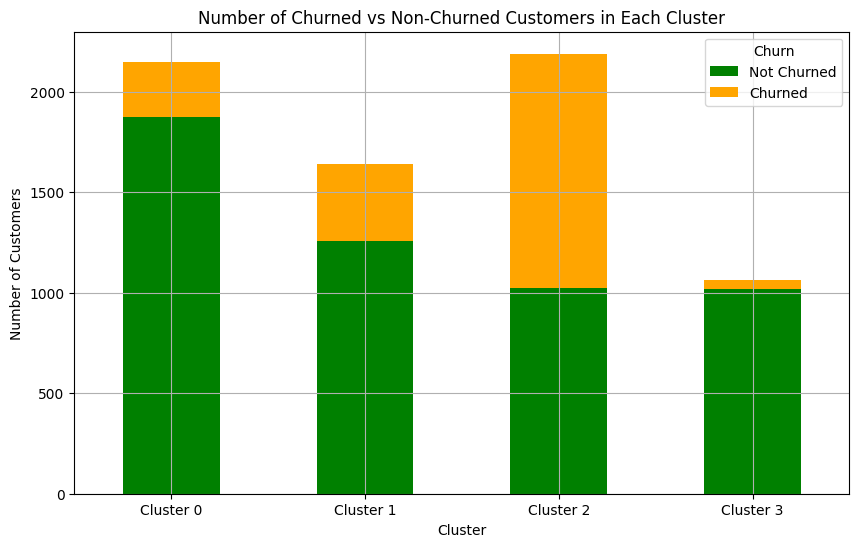

Churn,No,Yes
Impact_Cluster,,
0,1876,272
1,1258,385
2,1023,1167
3,1017,45


In [102]:
# Counting churned and non-churned customers in each cluster
churn_counts = data.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)

# Plotting the churn counts
churn_counts.plot(kind='bar', stacked=True, color=['green', 'orange'], figsize=(10, 6))
plt.title('Number of Churned vs Non-Churned Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(True)
plt.show()

churn_counts

**Cluster Analysis:**
- **Cluster 0:** Balanced churn and retention, possibly indicating mixed satisfaction levels or service experiences.
- **Cluster 1:** High retention, likely indicating satisfaction with services or pricing, making them valuable for long-term growth strategies.
- **Cluster 2 and Cluster 3:** Moderate to low churn, suggesting these segments experience fair satisfaction but could benefit from targeted improvements or loyalty programs.


**Correlation and Distribution Analyses:**
- **Fiber Optic Internet:** Customers with fiber optic internet have higher churn rates, possibly due to unmet expectations related to service quality or price.
- **Contract Types:** Month-to-month contracts are associated with higher churn, indicating that the lack of long-term commitment allows for easier switching.
- **Monthly Charges:** Higher monthly charges are linked to increased churn, suggesting customer sensitivity to pricing or competitive offers.
- **Tenure:** Shorter tenure strongly correlates with churn, indicating that newer customers are at a higher risk of leaving, possibly due to initial dissatisfaction or better competing offers.



**Impactful Features:**
- **Positive Correlation with Churn:** Month-to-month contracts, absence of online security, and lack of tech support.
- **Negative Correlation with Churn:** Longer tenure, opting for two-year contracts, and services like online security, streaming TV, online backup, and tech support, which can be accessed offline.


In [103]:
## Function to encode the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

def encode_categorical_data(data):
    encoded_data = data.copy()
    label_encoder = LabelEncoder()
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':
            encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    return encoded_data

def one_hot_encode(data):
    encoded_data = data.copy()
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':
            encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
            encoded_col = pd.DataFrame(encoder.fit_transform(encoded_data[[col]]))
            encoded_col.columns = [col + '_' + str(i) for i in range(encoded_col.shape[1])]
            encoded_data = pd.concat([encoded_data, encoded_col], axis=1)
            encoded_data.drop(col, axis=1, inplace=True)
    return encoded_data


# First, encode categorical data using LabelEncoder
encoded_data = encode_categorical_data(data)

# Then, apply one-hot encoding
encoded_data = one_hot_encode(encoded_data)

encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Impact_Cluster
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,2,29.85,29.85,0,2
1,1,0,0,0,34,1,0,0,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,0,0,1,0,...,1,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2


In [104]:
# Split the data into features and target variable
X = encoded_data.drop(columns=["Churn"])  # Features
y =encoded_data["Churn"]  # Target variable

In [105]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
# Apply SMOTE for handling imbalanced data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## RNN Model

In [108]:
# Define the RNN model
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

In [109]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)


In [110]:
# Train the model
history = model.fit(X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1), y_train_smote,
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.6174 - loss: 0.6536 - val_accuracy: 0.6579 - val_loss: 0.6251
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7061 - loss: 0.5791 - val_accuracy: 0.6707 - val_loss: 0.6146
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7313 - loss: 0.5443 - val_accuracy: 0.7048 - val_loss: 0.5673
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7410 - loss: 0.5253 - val_accuracy: 0.7331 - val_loss: 0.5242
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7733 - loss: 0.4897 - val_accuracy: 0.7438 - val_loss: 0.5076
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7698 - loss: 0.4805 - val_accuracy: 0.7459 - val_loss: 0.4927
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7631 - loss: 0.4912 - val_accuracy: 0.7381 - val_loss: 0.5189
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7799 - loss: 0.47

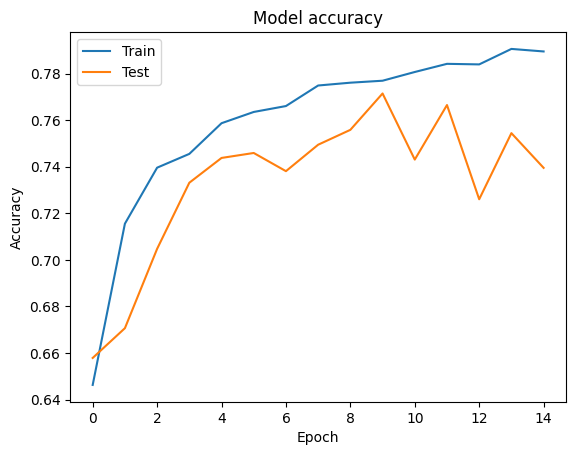

In [111]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

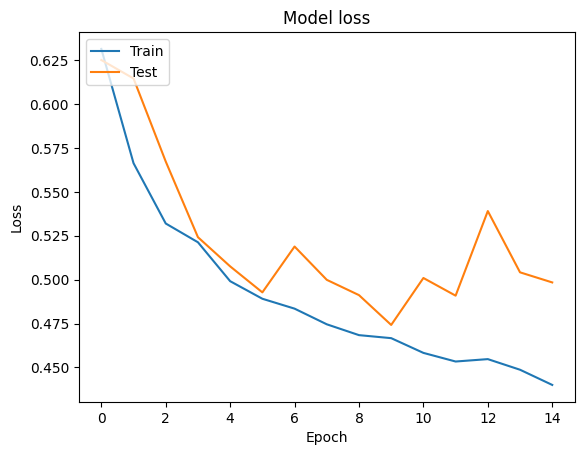

In [112]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [113]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7766 - loss: 0.4683
Test Loss: 0.4741927981376648, Test Accuracy: 0.7714691162109375


### ANN Model

In [114]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [115]:
# Train the model with early stopping
history = model.fit(X_train_smote, y_train_smote, 
                    validation_data=(X_test, y_test), 
                    epochs=100, batch_size=64, callbacks=[early_stopping])


Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6989 - loss: 0.5837 - val_accuracy: 0.7339 - val_loss: 0.5053
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7664 - loss: 0.4752 - val_accuracy: 0.7331 - val_loss: 0.4975
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7711 - loss: 0.4678 - val_accuracy: 0.7367 - val_loss: 0.5009
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.4491 - val_accuracy: 0.7750 - val_loss: 0.4580
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7852 - loss: 0.4505 - val_accuracy: 0.7310 - val_loss: 0.5132
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.4363 - val_accuracy: 0.7424 - val_loss: 0.4948
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7876 - loss: 0.4457 - val_accuracy: 0.7736 - val_loss: 0.4596
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8051 - loss: 0.4198 - val_accu

In [116]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4543
Test Loss: 0.4569019079208374
Test Accuracy: 0.7785663604736328


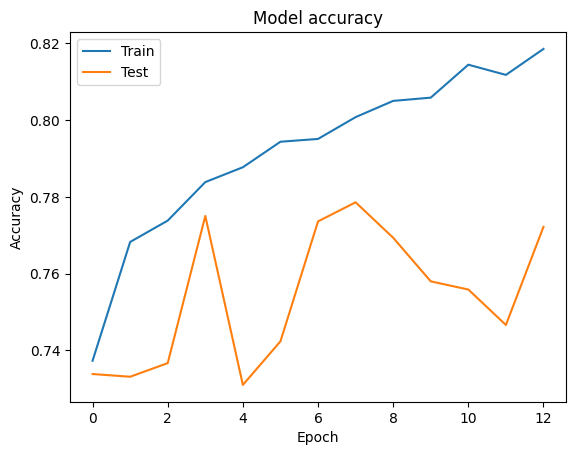

In [117]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

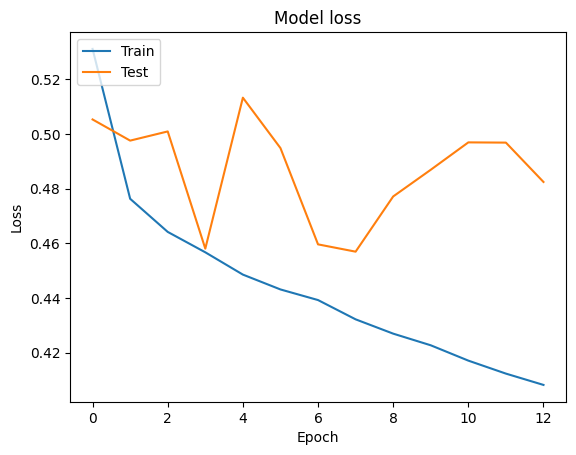

In [118]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### LSTM 

In [119]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use SMOTE to handle imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [120]:
# Reshape input data for LSTM
X_train_reshaped = X_train_balanced.reshape(X_train_balanced.shape[0], 1, X_train_balanced.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [121]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

In [122]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [123]:
# Train the model
history = model.fit(X_train_reshaped, y_train_balanced, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6871 - loss: 0.6060 - val_accuracy: 0.6848 - val_loss: 0.6483
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7726 - loss: 0.4684 - val_accuracy: 0.7415 - val_loss: 0.5732
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7678 - loss: 0.4667 - val_accuracy: 0.7198 - val_loss: 0.5857
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - loss: 0.4432 - val_accuracy: 0.7277 - val_loss: 0.5700
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.4530 - val_accuracy: 0.7222 - val_loss: 0.5684
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7798 - loss: 0.4469 - val_accuracy: 0.7373 - val_loss: 0.5374
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7758 - loss: 0.4476 - val_accuracy: 0.7271 - val_loss: 0.5544
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7861 - loss: 0.4470 - val_accuracy: 0.

In [124]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4200
Test Loss: 0.427438348531723
Test Accuracy: 0.8019872307777405


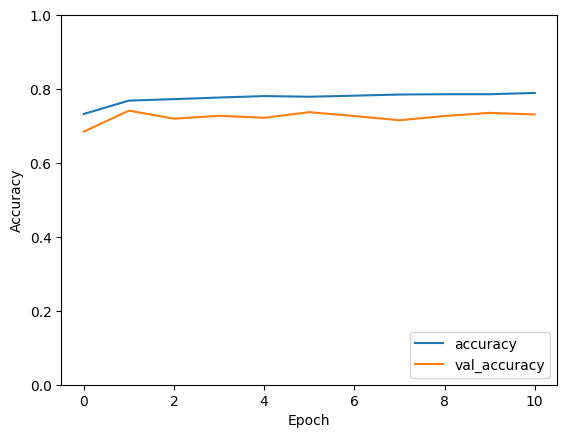

In [125]:
# Visualize training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

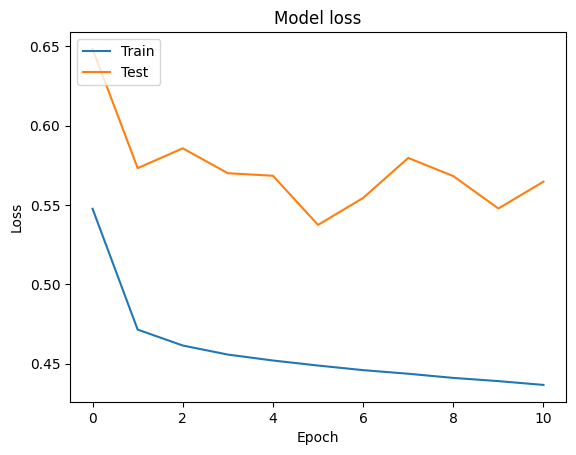

In [126]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

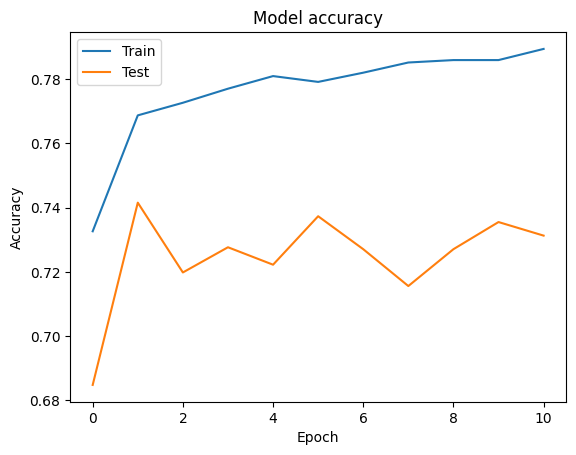

In [127]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#### Combination of 9 algorithms namely, Random Forest,Gradient Boosting,Support Vector Machine,Logistic Regression,K-Nearest Neighbors,Decision Tree,Ada Boost,XG Boost and Naive Bayes,training them and comparing them for the best out of it.

In [129]:
# Initialize an empty list to store model scores

model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  #  hyperparameters for Random Forest

    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # hyperparameters for Gradient Boosting

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # hyperparameters for SVM

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  #  hyperparameters for Logistic Regression

    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  #  hyperparameters for KNN

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # hyperparameters for Decision Tree

    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  #  hyperparameters for Ada Boost
         
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", "{:.2f}".format(best_accuracy), "%")

Model: Random Forest
Test Accuracy: 0.803 %

Model: Gradient Boosting
Test Accuracy: 0.806 %

Model: Support Vector Machine
Test Accuracy: 0.752 %

Model: Logistic Regression
Test Accuracy: 0.757 %

Model: K-Nearest Neighbors
Test Accuracy: 0.761 %

Model: Decision Tree
Test Accuracy: 0.776 %

Model: Ada Boost
Test Accuracy: 0.801 %

Model: XG Boost
Test Accuracy: 0.808 %

Model: Naive Bayes
Test Accuracy: 0.764 %

Best Model:
Test Accuracy: 0.808374733853797
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
            

#### Model evaluation of the best model with the highest test accuracy

In [130]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test data using the best model (assuming XGBClassifier is the best model)
y_pred_best = best_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Calculate precision
precision = precision_score(y_test, y_pred_best)

# Calculate recall
recall = recall_score(y_test, y_pred_best)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_best)

# Print confusion matrix, precision, recall, and F1 score
print("Confusion Matrix:")
print(conf_matrix)
print()
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))


Confusion Matrix:
[[953  83]
 [187 186]]

Precision: 0.691
Recall: 0.499
F1 Score: 0.579


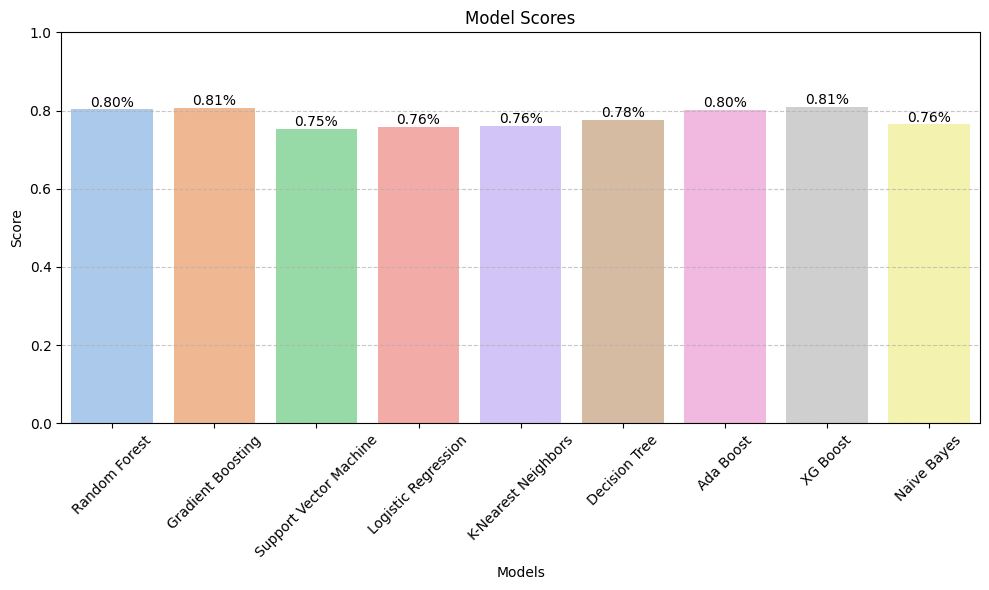

In [131]:
#Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary,
#### Out of all the trained algorithms, XGBoost emerged the best with an accuracy of 81% which is higher than all the others. Therefore,  for this problem the best model to deployed should be XGBOOST.